# Interpretability
Interpretacao dos modelos de Machine Learning e analise dos atributos relevantes

#### Imports

In [1]:
import pandas as pd
import pickle
import shap
import os
import sys

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../src/')
from visualization.visualize import *

import shap

from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

pd.set_option('display.max_columns', None)

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


## Load model

In [2]:
with open('../models/model_1.pkl', 'rb') as fpkl:
    model1 = pickle.load(fpkl)
    
with open('../models/model_2.pkl', 'rb') as fpkl:
    model2 = pickle.load(fpkl)
    
with open('../models/model_tree.pkl', 'rb') as fpkl:
    tree = pickle.load(fpkl)

## Carregar dados

In [3]:
PATH = '../data/processed/'

In [4]:
dataset = pd.read_csv(os.path.join(PATH, 'dataset_final.csv'), sep=',')
print(dataset.shape)
dataset.head()

(4523, 127)


,DESEMPENHO,CAPITAL,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_PUBLIC,GVA_TOTAL,GDP,GDP_CAPITA,COMP_H,COMP_O,COMP_P,COMP_Q,DEPENDENCIAS_SALAS_AULA,DEPENDENCIAS_SALA_RECURSO,DEPENDENCIAS_TOT_SALAS_AULA,DEPENDENCIAS_CANTINA,DEPENDENCIAS_COPA,DEPENDENCIAS_REFEITORIO,DEPENDENCIAS_SALA_LEITURA,DEPENDENCIAS_TOT_SALA_LEITURA,DEPENDENCIAS_TOT_QUADRA,DEPENDENCIAS_SALA_PROF,DEPENDENCIAS_PATIO_COBERTO,DEPENDENCIAS_PATIO_DESCOBERTO,DEPENDENCIAS_TOT_VESTIARIO,DEPENDENCIAS_LAB_INFO,DEPENDENCIAS_LAB_CIENCIAS,DEPENDENCIAS_LAB_CIENCIA_FISICA_BIOLOGICA,DEPENDENCIAS_TOT_LAB_CIENCIA,DEPENDENCIAS_LAB_MULTIUSO,DEPENDENCIAS_OFICINA,DEPENDENCIAS_DORMITORIO,DEPENDENCIAS_SANITARIO_ADEQ_DEF,DEPENDENCIAS_SANITARIO_AL_MASC,DEPENDENCIAS_SANITARIO_AL_FEM,DEPENDENCIAS_TOT_SANITARIO_AL,DEPENDENCIAS_TOT_SANITARIO_FUNC,DEPENDENCIAS_DEPEND_ADEQ_DEF,DEPENDENCIAS_SALA_ED_FISICA,DEPENDENCIAS_SALA_PROG_ESC_FAMILIA,DEPENDENCIAS_BRINQUEDOTECA,DEPENDENCIAS_SALA_REFORCO,DEPENDENCIAS_AREA_SERVICO,DEPENDENCIAS_SALA_ATENDIMENTO,DEPENDENCIAS_SALA_ENTRETENIMENTO,FORMACAO_APERF/EXTENSIAOCULTURAL,FORMACAO_BACHARELADO/TECNIOLOGO,FORMACAO_DOUTORADO,FORMACAO_ENSINO_MEDIO,FORMACAO_ESPECIALIZACAO,FORMACAO_LICENCIATURA,FORMACAO_MESTRADO,FORMACAO_S/INFO,QTD_SERVIDORES,QTD_PROFESSORES,MEDIA_FORMACOES,QTD_FORMACAO_CONTINUADA,QTD_CARGOS_DISTINTOS,QTD_TOTAL_ALUNOS,QTD_CLASSES,MEDIA_ALUNOS_SALA,STD_ALUNOS_SALA,QTD_CLASSES_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_CLASSES_TIPO_ENSINO MEDIO,QTD_CLASSES_TIPO_CEL,QTD_ALUNOS_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_ALUNOS_TIPO_ENSINO MEDIO,QTD_ALUNOS_TIPO_CEL,DIRETORES_QTD_2018,VICE_DIRETOR_QTD_2018,COORDENADORES_QTD_2018,DIRETORES_QTD_5_ANOS,VICE_DIRETOR_QTD_5_ANOS,COORDENADORES_QTD_5_ANOS,DIRETOR_IDADE,DIRETOR_CARGO_CLAS_EXER_IGUAIS,DIRETOR_ANOS_TRAB_CARGO_C,DIRETOR_ANOS_TRAB_CARGO_C.1,DIRETOR_ANOS_TRAB_CARGO_E,JORNADA_QTD_DISCIPLINAS_mean,JORNADA_QTD_DISCIPLINAS_std,JORNADA_QTD_DISCIPLINAS_max,JORNADA_QTD_TOTAL_AULAS_mean,JORNADA_QTD_TOTAL_AULAS_std,JORNADA_QTD_TOTAL_AULAS_max,SERVIDORES_IDADE_mean,SERVIDORES_IDADE_std,SERVIDORES_TEMPO_CARGO_C_mean,SERVIDORES_TEMPO_CARGO_C_std,SERVIDORES_CAT_FUNCIONAL_A,SERVIDORES_CAT_FUNCIONAL_F,SERVIDORES_CAT_FUNCIONAL_N,SERVIDORES_CAT_FUNCIONAL_O,SERVIDORES_CAT_FUNCIONAL_P,MATEMATICA,LEITURA,ESCRITA,RELACAO_ALUNO_POR_SERVIDOR,RELACAO_ALUNO_POR_PROFESSOR,CLUSTER__0,CLUSTER__1,CLUSTER__2,CLUSTER__3,CLUSTER__4,CLUSTER__5,CLUSTER__6,CLUSTER__7,CLUSTER__8,CLUSTER__9,CLUSTER__10,CLUSTER__11,CLUSTER__12,CLUSTER__13,CLUSTER__14,CLUSTER__15,CLUSTER__16,CLUSTER__17,CLUSTER__18,CLUSTER__19,DIRETOR_TITULO__BACHARELADO/TECNIOLOGO,DIRETOR_TITULO__DOUTORADO,DIRETOR_TITULO__ENSINO_MEDIO,DIRETOR_TITULO__ESPECIALIZACAO,DIRETOR_TITULO__LICENCIATURA,DIRETOR_TITULO__MESTRADO,DIRETOR_TITULO__S/INFO
0,0.0,1.0,1521.11,12176866.0,1.0,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,35.0,0.0,35.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101695,0.008475,0.016949,0.016949,0.771186,0.084746,0.0,139.0,118.0,1.228814,13.0,6.0,2703.0,88.0,30.715909,7.214208,34.0,40.0,0.0,956.0,1229.0,0.0,3.0,6.0,3.0,11.0,19.0,17.0,33.0,1.0,0.0,0.0,0.0,3.486726,1.768348,10.0,48.849558,20.847756,108.0,47.024096,8.739224,10.819277,6.428119,0.789157,0.144578,0.0,0.066265,0.0,4.0,3.0,4.0,19.446043,22.906780,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1521.11,12176866.0,1.0,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,21.0,1.0,22.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.095238,0.011905,0.000000,0.142857,0.738095,0.011905,0.0,92.0,84.0,1.297619,14.0,4.0,2164.0,69.0,31.362319,8.549116,34.0,29.0,0.0,1189.0,945.0,0.0,4.0,5.0,3.0,13.0,15.0,13.0,50.0,0.0,18.0,18.0,0.0,2.975000,1.492386,8.0,46.525000,19.308931,104.0,45.460784,8.618541,8.598039,5.794952,0.754902,0.176471,0.0,0.068

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['DESEMPENHO'], axis=1), dataset['DESEMPENHO'], test_size=0.2, random_state=17)

# Analise do resultado do Classificador LGBM

### Importancia das features
Este modelo baseado em comites de arvores de decisao tem o mecanismo de calcular a importancia que os atributos tiveram para predicao

In [6]:
feature_importances_df = pd.DataFrame(zip(X_train.columns, model1.feature_importances_))
feature_importances_df.columns = ['ATRIBUTO', 'IMPORTANCIA']
feature_importances_df = feature_importances_df.set_index('ATRIBUTO')

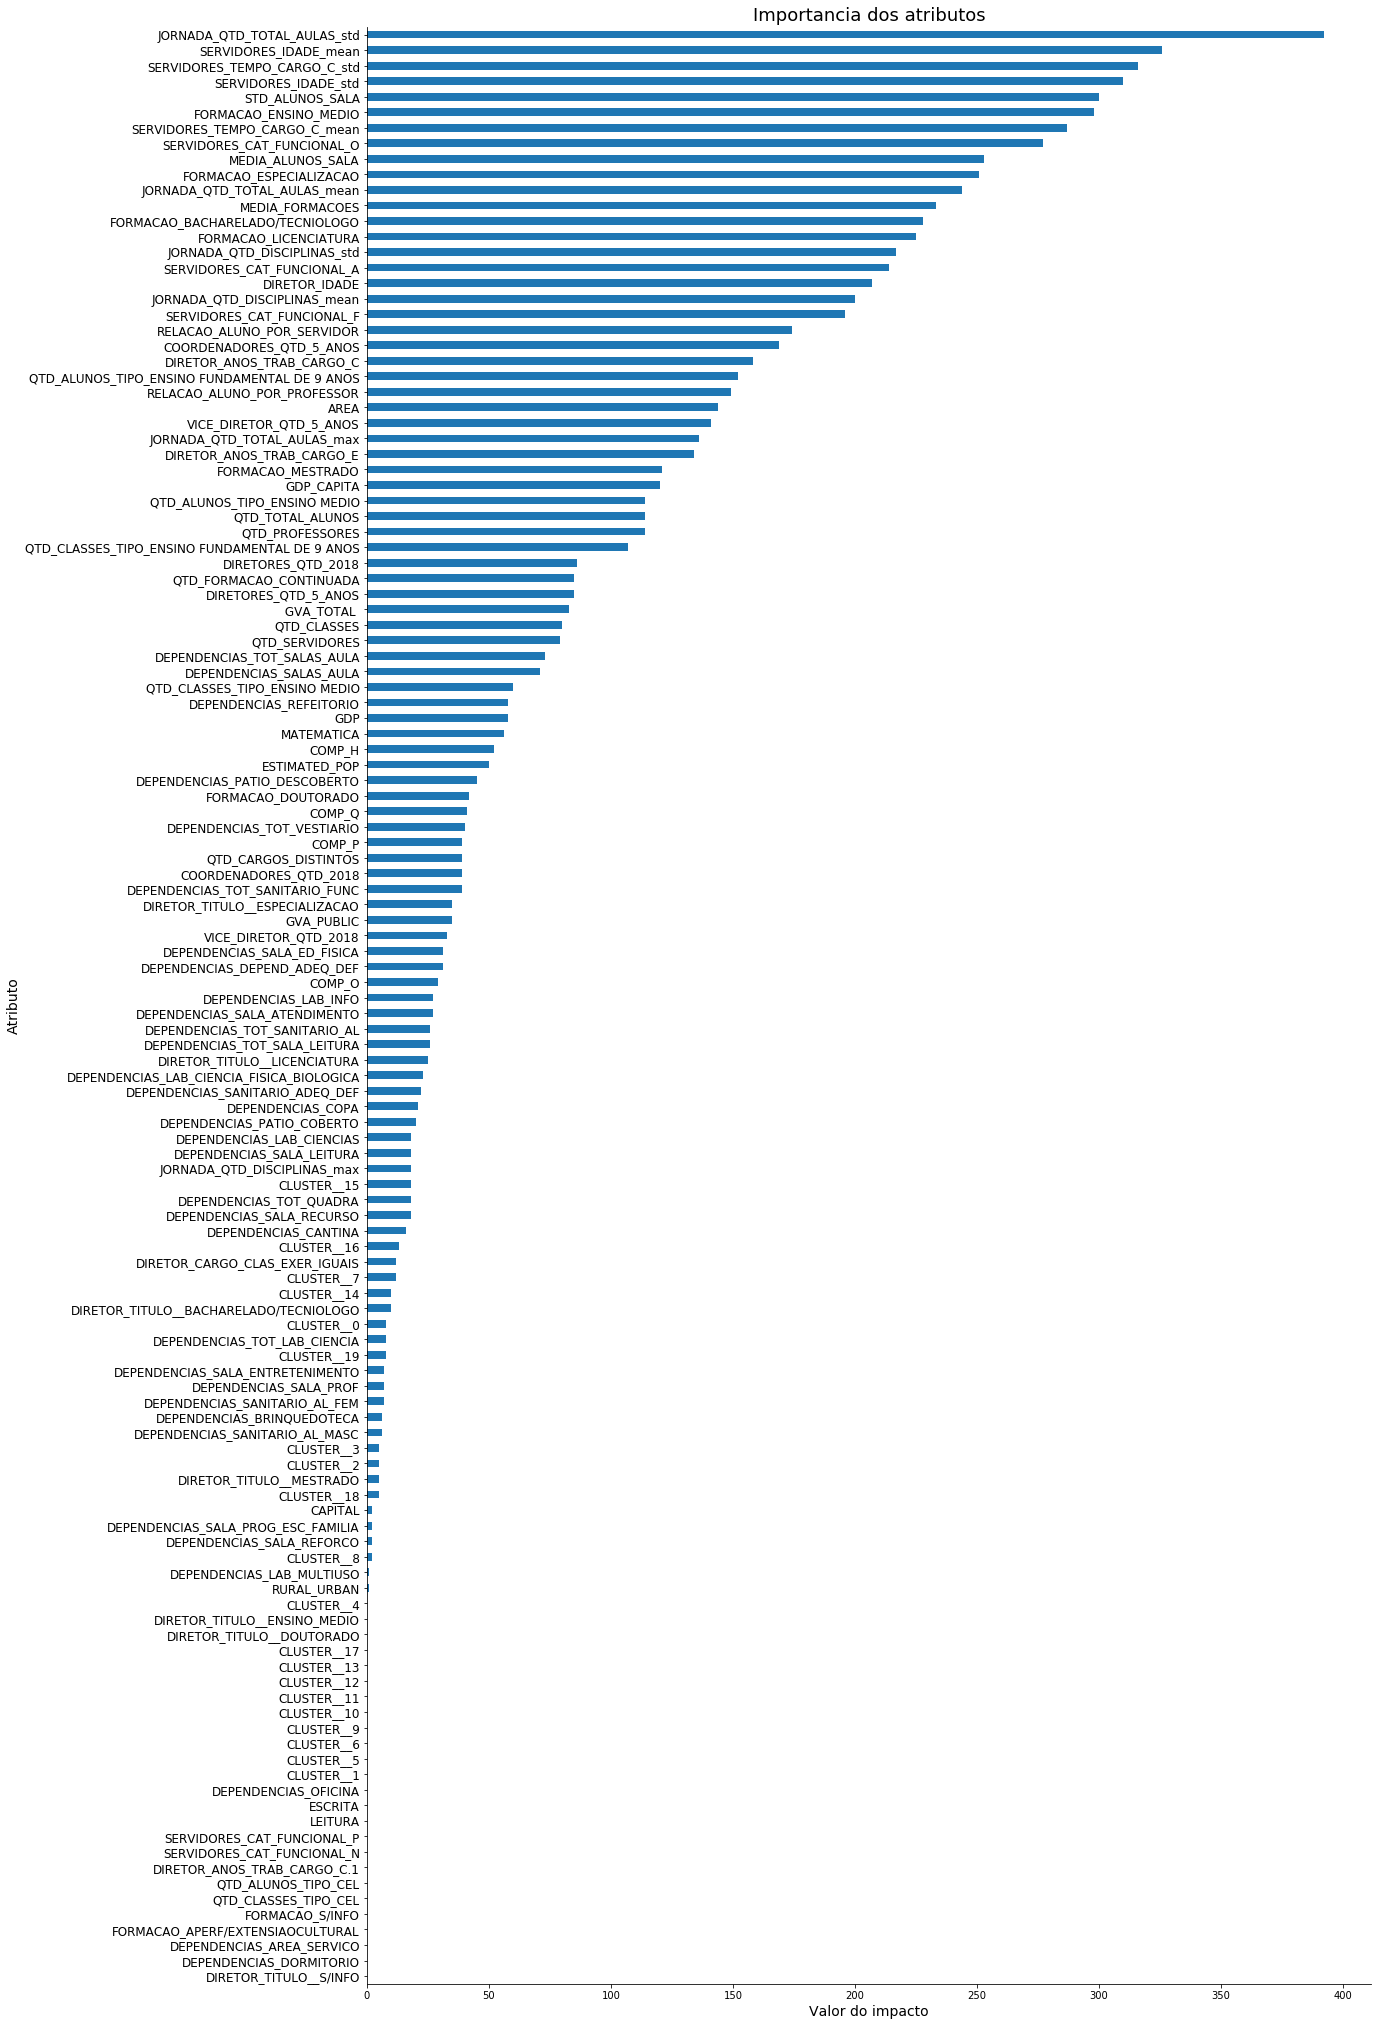

In [7]:
fig, ax = plt.subplots(figsize=(18, 36))
feature_importances_df.sort_values(by='IMPORTANCIA').plot(kind='barh', label=None, ax=ax)

ax.set_title('Importancia dos atributos', fontsize=18)
ax.set_ylabel('Atributo', fontsize=14)
ax.set_xlabel('Valor do impacto', fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='y', labelsize=12)

ax.get_legend().remove()

## 20 Atributos mais importantes

In [8]:
feature_importances_df.sort_values(by='IMPORTANCIA', ascending=False).head(20).index.to_frame(index=None)

,ATRIBUTO
0,JORNADA_QTD_TOTAL_AULAS_std
1,SERVIDORES_IDADE_mean
2,SERVIDORES_TEMPO_CARGO_C_std
3,SERVIDORES_IDADE_std
4,STD_ALUNOS_SALA
5,FORMACAO_ENSINO_MEDIO
6,SERVIDORES_TEMPO_CARGO_C_mean
7,SERVIDORES_CAT_FUNCIONAL_O
8,MEDIA_ALUNOS_SALA
9,FORMACAO_ESPECIALIZACAO


## Shap (SHapley Additive exPlanations)
Tecnica para interpretacao do impacto dos atributos.

Quanto mais alto o atributo estiver, maior foi o impacto, o que pode ser visto pensando nos valores absolutos no eixo X. A saturacao de azul a vermelhor representa o valor da instancia para aquele atributo, quanto menor, mais proximo do azul, e quanto maior, mais vermelho. O impacto negativo do shap value (eixo x), indica que o valor o atributo levou para classe negativa (desempenho ruim), e no sentido oposto para o desempenho bom.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


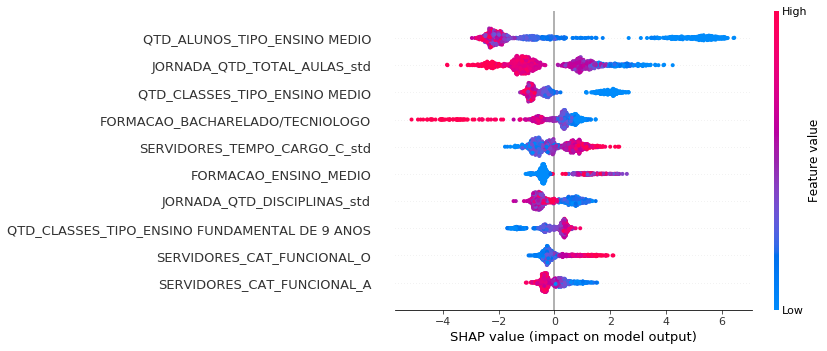

In [9]:
explainer = shap.TreeExplainer(model1)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, max_display=10)

### Relevancia muito alta para escolas com Ensino Medio
Como foi mencionado na secao de Machine Learning, o modelo aprende que escolas com ensino medio tendem a ter um desempenho ruim, o que faz sentido quando eh analisada a distribuicao dos desempenhos por serie, como pode ser visto na [analise do SARESP](01-eda-saresp.ipynb).

Esse fator ja eh uma informacao muito relevante e de alto grau de impacto

### Comparacao entre as distribuicoes de **Quantidade de Alunos do Ensino Medio** em escolas com desempenho BOM e RUIM
O grafico a seguir apresenta a densidade de probabilidade, dessa forma as amostras (escolas boas e escolas ruins) podem ter tamanhos diferentes.

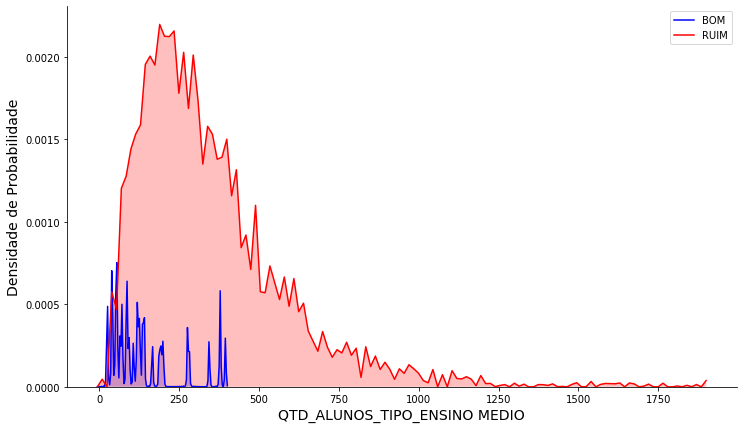

In [10]:
plot_kde_two_samples(dataset, 'QTD_ALUNOS_TIPO_ENSINO MEDIO', bw=2)

### Por esse motivo foi construido um modelo sem atributos dessa natureza para especializar mais o conhecimento das outras caracteristicas

In [11]:
cols_to_drop = ['QTD_ALUNOS_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS', 'QTD_ALUNOS_TIPO_ENSINO MEDIO', 'QTD_ALUNOS_TIPO_CEL', 'QTD_CLASSES_TIPO_ENSINO MEDIO', 'QTD_CLASSES_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS', 'QTD_CLASSES_TIPO_CEL']

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


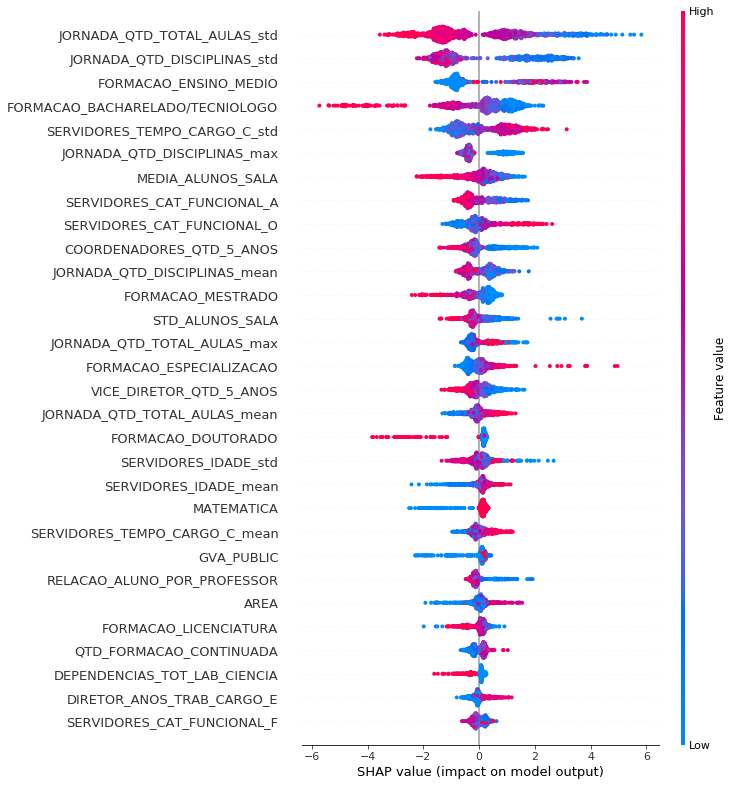

In [12]:
explainer = shap.TreeExplainer(model2)

shap_values = explainer.shap_values(X_test.drop(cols_to_drop, axis=1))
shap.summary_plot(shap_values[1], X_test.drop(cols_to_drop, axis=1), max_display=30)

### Quantidade media de alunos nas salas
A quantidade de alunos na turma 'e um fator relevante no desempenho escolar. Analisando o valor medio nas ecolas, 'e notavel que quantidade alta afeta de forma negativa, baseada na distribuicao das amostras de desempenho bom e ruim.

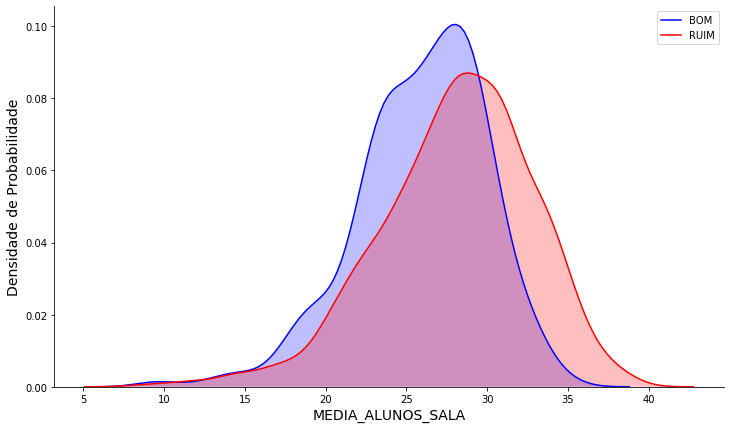

In [13]:
plot_kde_two_samples(dataset, 'MEDIA_ALUNOS_SALA')

### Titulo de Especializacao
Alguns atributos construidos do dataset representam a distribuicao de determinada caracteristica nominal. Neste caso, foi considerada a distribuicao da formacao dos professores na escola. O valor vai de 0 (0%) a 1 (100%), que representa a porcentagem de professores que tem especializacao (como maior formacao) na escola. 

A especializacao teve um impacto positivo no desempenho, apesar de nao discriminar tanto as classes, existe um ganho em ter mais professores com esta titulacao dentro da escola, principalmente quando olhamos os valores proximos de 0, onde ha uma concentracao maior de escolas com desempenho ruim.

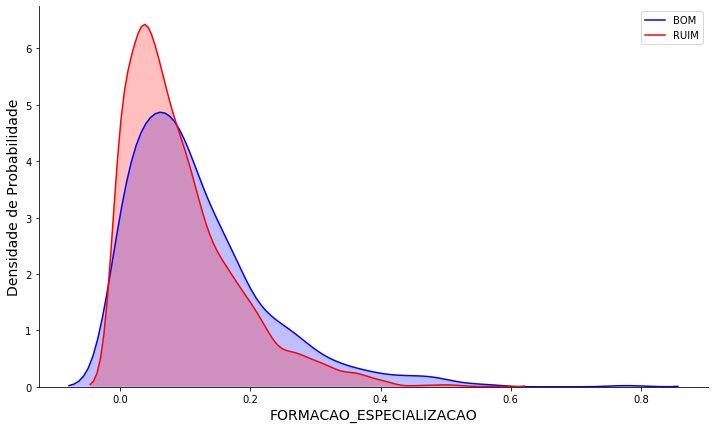

In [14]:
plot_kde_two_samples(dataset, 'FORMACAO_ESPECIALIZACAO')

### Quantidade total de alunos
As escolas com mais alunos apresentaram desempenho pior. Um dos motivos pode ser a presenca do ensino medio, que aumentou o numero destes alunos e tem um forte desbalanceamento quando analisado o desempenho baseado na semparacao Bom e Ruim. Ressaltando que bom parte do desempenho do ensino medio estava no nivel Basico, dado os limites do SARESP, porem a separacao dos dados para esta modelagem considerou as escolas Boas as que tiveram desempenho Adequado e Avancado.

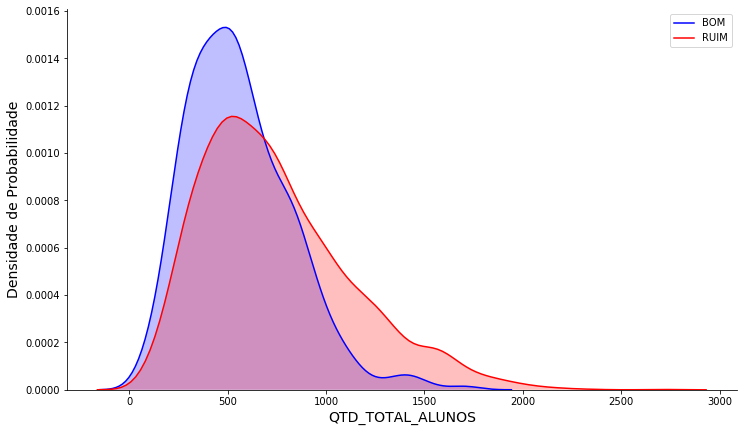

In [15]:
plot_kde_two_samples(dataset, 'QTD_TOTAL_ALUNOS')

### Titulo de Ensino Medio
O resultado desse atributo nao significa que o numero deve professores com ensino medio deve ser muito alto, mas sim que valores muito baixos impactaram negativamente. Ou seja, existe um impacto positivo de ter profissionais com essa titulacao dando aula. O valor desse atributo vai de 0 a 1, onde 1 eh 100% dos professores da escola.

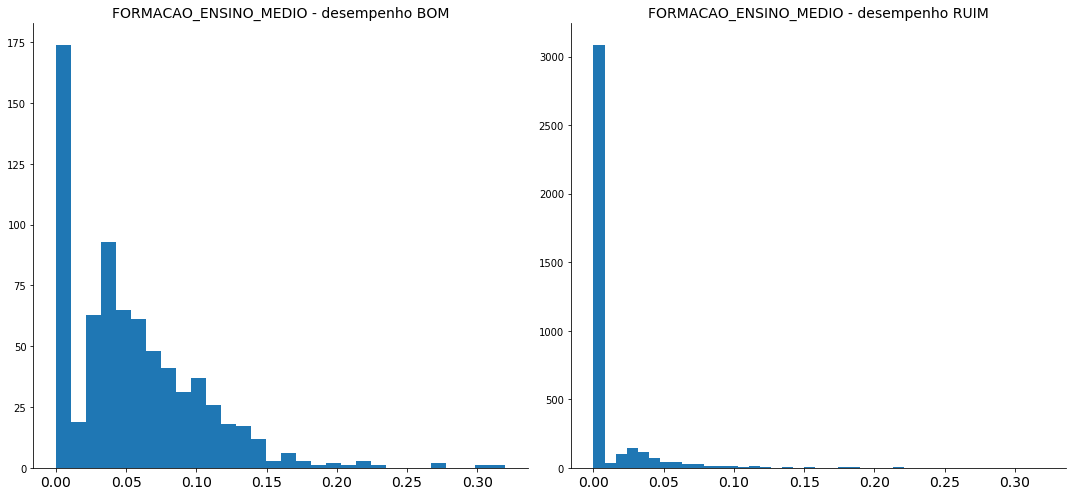

In [16]:
plot_two_hist(dataset, 'FORMACAO_ENSINO_MEDIO')

### Sobre a alocacao de disciplinas do professor, temos a **Media da quantidade total de Horas de Aulas** alta impactando positivamente enquanto a **Media da quantidade de Disciplinas** alta impacta negativamente

- Uma quantidade alta de horas de aula na mesma escola pode ser um indicador positivo, pois o professor tem mais dedicacao nesta, gastando menos tempo com deslocamento para outro trabalho, algo muito comum na jornada dos professores.
- Enquanto o numero alto de disciplinas requer muita dedicao a diversas turmas, multiplicando o trabalho que nem sempre 'e replicavel entre estas.

#### Quantidade media do total de hora de aula dos professores na escola

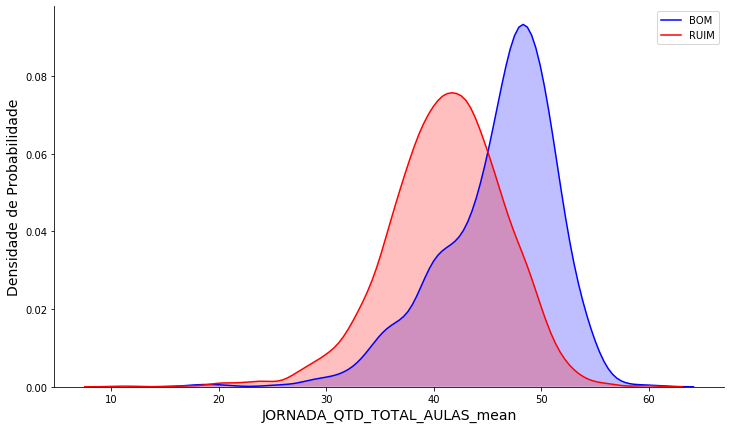

In [17]:
plot_kde_two_samples(dataset, 'JORNADA_QTD_TOTAL_AULAS_mean')

#### Quantidade media do total de disciplinas dos professores na escola

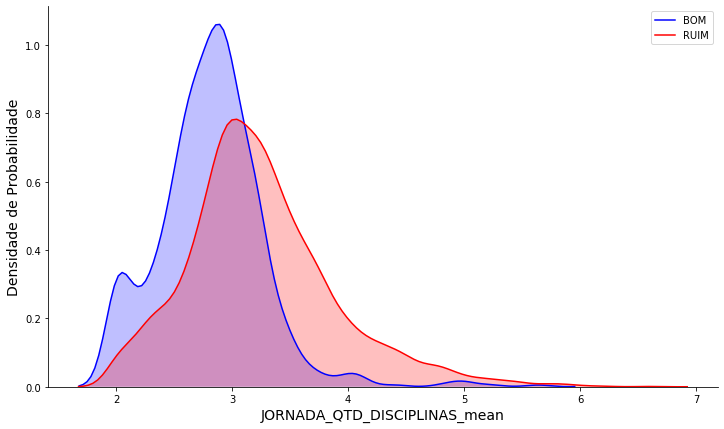

In [18]:
plot_kde_two_samples(dataset, 'JORNADA_QTD_DISCIPLINAS_mean')

### Tempo de trabalho da diretoria
O tempo de trabalho do diretor(a) no cargo, tanto de classificacao como de exercicio (geral sao o mesmo ou bem proximo), apresentou impacto positivo quando a experiencia era maior. Um aspecto interessangte na distribuicao dos dados em geral 'e a pouca ocorrencia de valores de 1 a 10 anos. 

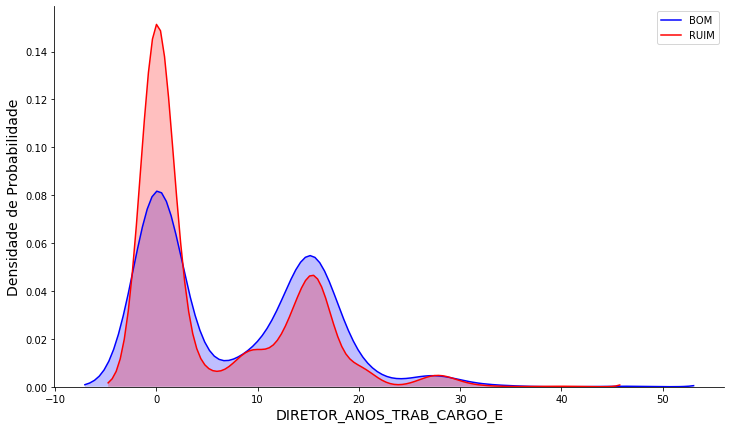

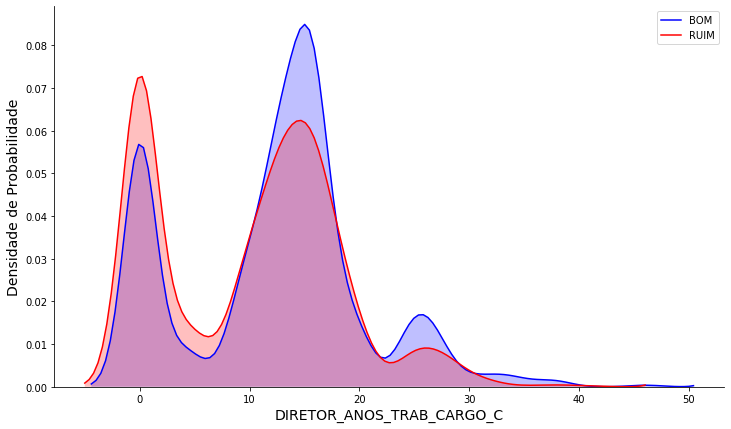

In [19]:
plot_kde_two_samples(dataset, 'DIRETOR_ANOS_TRAB_CARGO_E')
plot_kde_two_samples(dataset, 'DIRETOR_ANOS_TRAB_CARGO_C')

### Troca de coordenadores constante impactou negativamente
De acordo com a quantidade de coordenadores nos ultimos 5 anos (2014 a 2018), nas escolas com bom desempenho foram realizadas menos mudancas neste cargo, enquanto nas escolas com desempenho ruim houveram mais pessoas neste cargo.

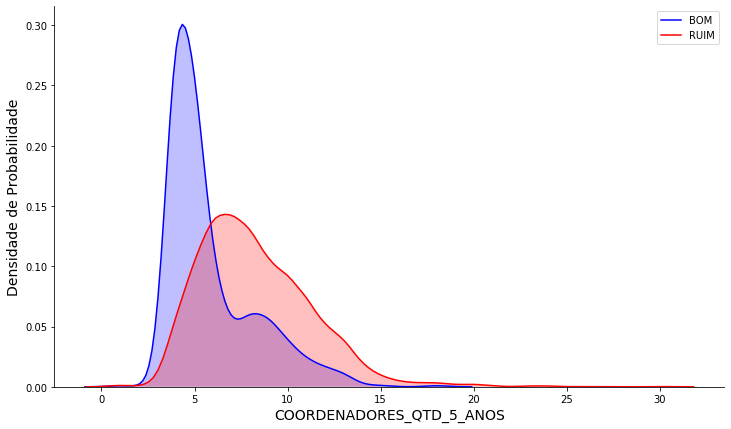

In [20]:
plot_kde_two_samples(dataset, 'COORDENADORES_QTD_5_ANOS')

### Analise do desempenho baseado na **Quantidade media de Disciplinas** e **Quantidade media de alunos na sala** por escola
Ambos atributos foram analisados anteriormente, porem esta analise consiste em verificar a distribuicao dos dados nessas duas dimensoes simultaneamente.

Apesar do desbalanceamento (mais exemplos Ruins que Bons), as escolas boas se concentram em *quantidade media de disciplinas* mais baixas e *quantidade media de alunos na sala*  com valores intermediarios e baixos. Ja as escolas com desempenhos ruins atingem os maiores valores

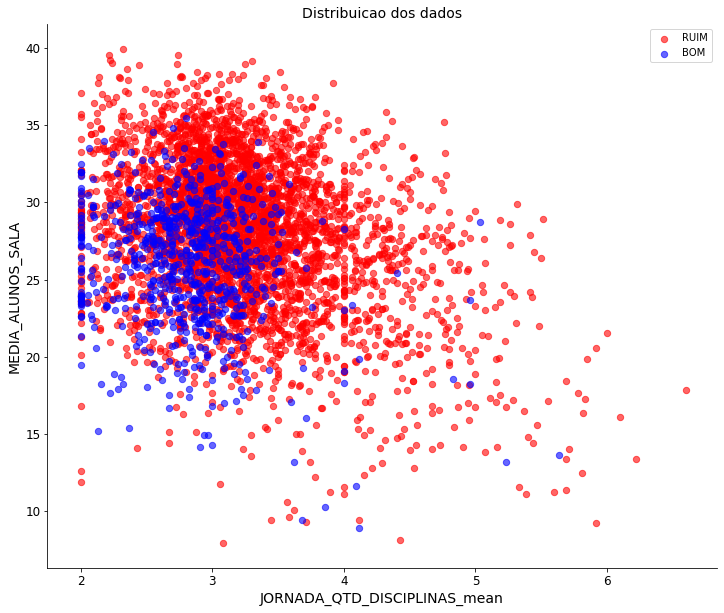

In [21]:
plot_scatter(dataset, 'JORNADA_QTD_DISCIPLINAS_mean', 'MEDIA_ALUNOS_SALA')

### Servidores da categoria funcional A (Ingressaram na Rede por meio deconcurso público)
Com logica semelhante a analise de formacao, esse atributo considera a distribuicao da categoria funcional dos professores nas escolas. A distribuicao de probabilidade das amostras de desempenho bom e ruim, mostram que as escolas com grande concentracao (porcentagem) de servidores da categoria funcional A, de 70% a 100%, obtiveram desempenho pior.

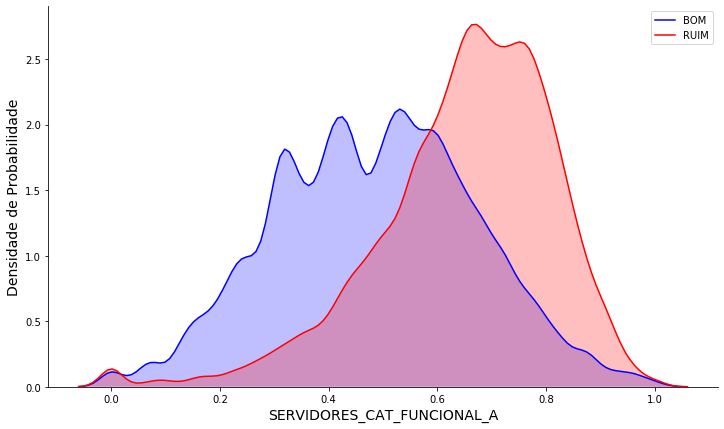

In [22]:
plot_kde_two_samples(dataset, 'SERVIDORES_CAT_FUNCIONAL_A', bw=0.02)

### Fatores relacionados a grande concentracao da categoria funcional A
A analise anteorior traz uma informacao relevante, porem necessita um aprofundamento maior tanto no dominio quanto em relacao aos dados. Dessa forma, foi realizada uma analise alguns aspectos relacionados a grande concentracao da categoria funcional A.

#### Categoria Funcional A e Quantidade media de alunos na sala
Relacionando os dois atributos e analisando a distribuicao das probabilidades destes, o que leva em conta a densidade das classes. Essa forma facilita para entender onde os dados se concentram, e tem menos interferencia do desbalanceamento. 

A imagem a seguir mostra que existe uma concentracao alta de muitos servidores da categoria funcional A nas escolas com desempenho ruim, porem tambem existe um numero elevado na quantidade media de alunos por sala. Essa concentracao pode ser identificada no deslocamento da classe Ruim para o canto superior direito.

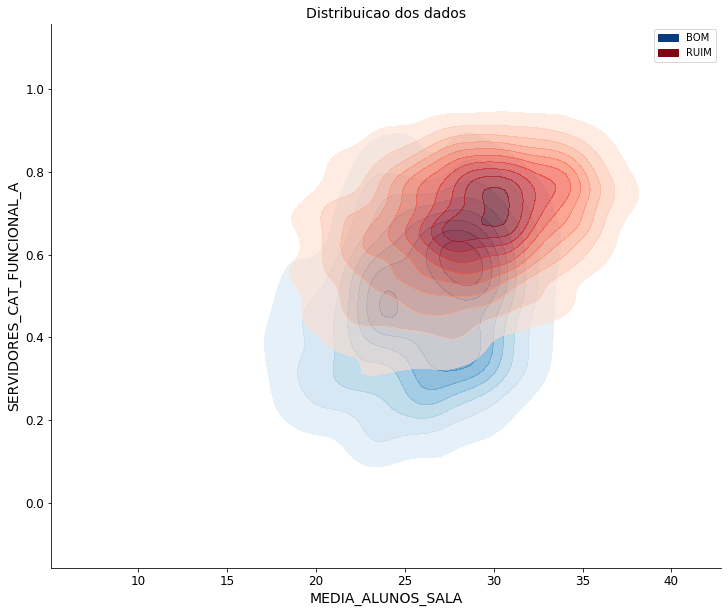

In [23]:
plot_density_2d(dataset, x='MEDIA_ALUNOS_SALA', y='SERVIDORES_CAT_FUNCIONAL_A')

#### Categoria Funcional A e Relacao da quantidade de aluno pela quantidade de servidores
Semelhante a analise superior, a concentracao de servidores da categoria funcional A aparece junto de um numero elevado na relacao aluno por servidor, mesmo que de forma menor que a relacao anterior.

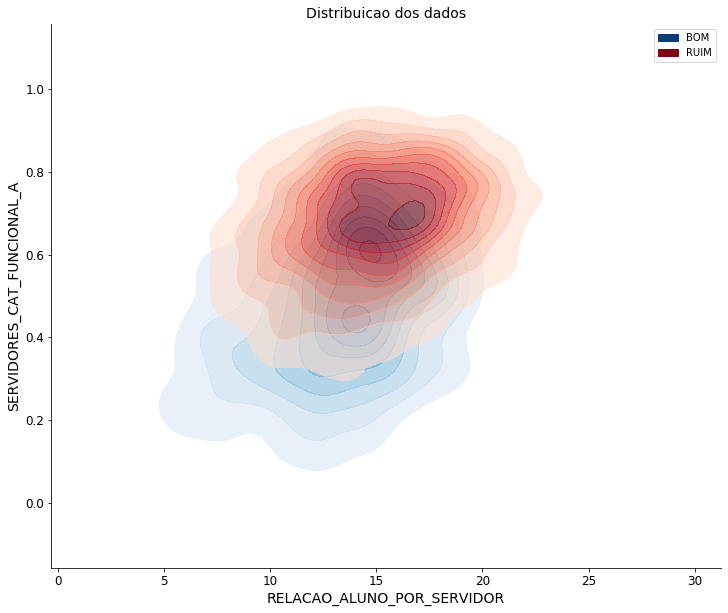

In [24]:
plot_density_2d(dataset, x='RELACAO_ALUNO_POR_SERVIDOR', y='SERVIDORES_CAT_FUNCIONAL_A')

## Regras a partir de Arvore de Decisao
Alem da importancia dos atributos, dos resultados, impactos e insights verificados acima, tambem 'e possivel extrar regras da arvore de decisao que foi treinada na etapa de Machine Learning, e obteve uma acuracia de 91,2%. A arvore foi treinada com uma profundidade baixa, isto 'e, manteve um tamanho pequeno, o que permite extrair e entender mais facil as regras geradas.

In [25]:
X = X_train.drop(cols_to_drop, axis=1)

In [26]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=X.columns.to_list(), class_names=['RUIM', 'BOM'],
                filled=True, rounded=True, proportion=True, max_depth=4)

In [27]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [28]:
graph.write_png('../reports/figures/tree.png')

True

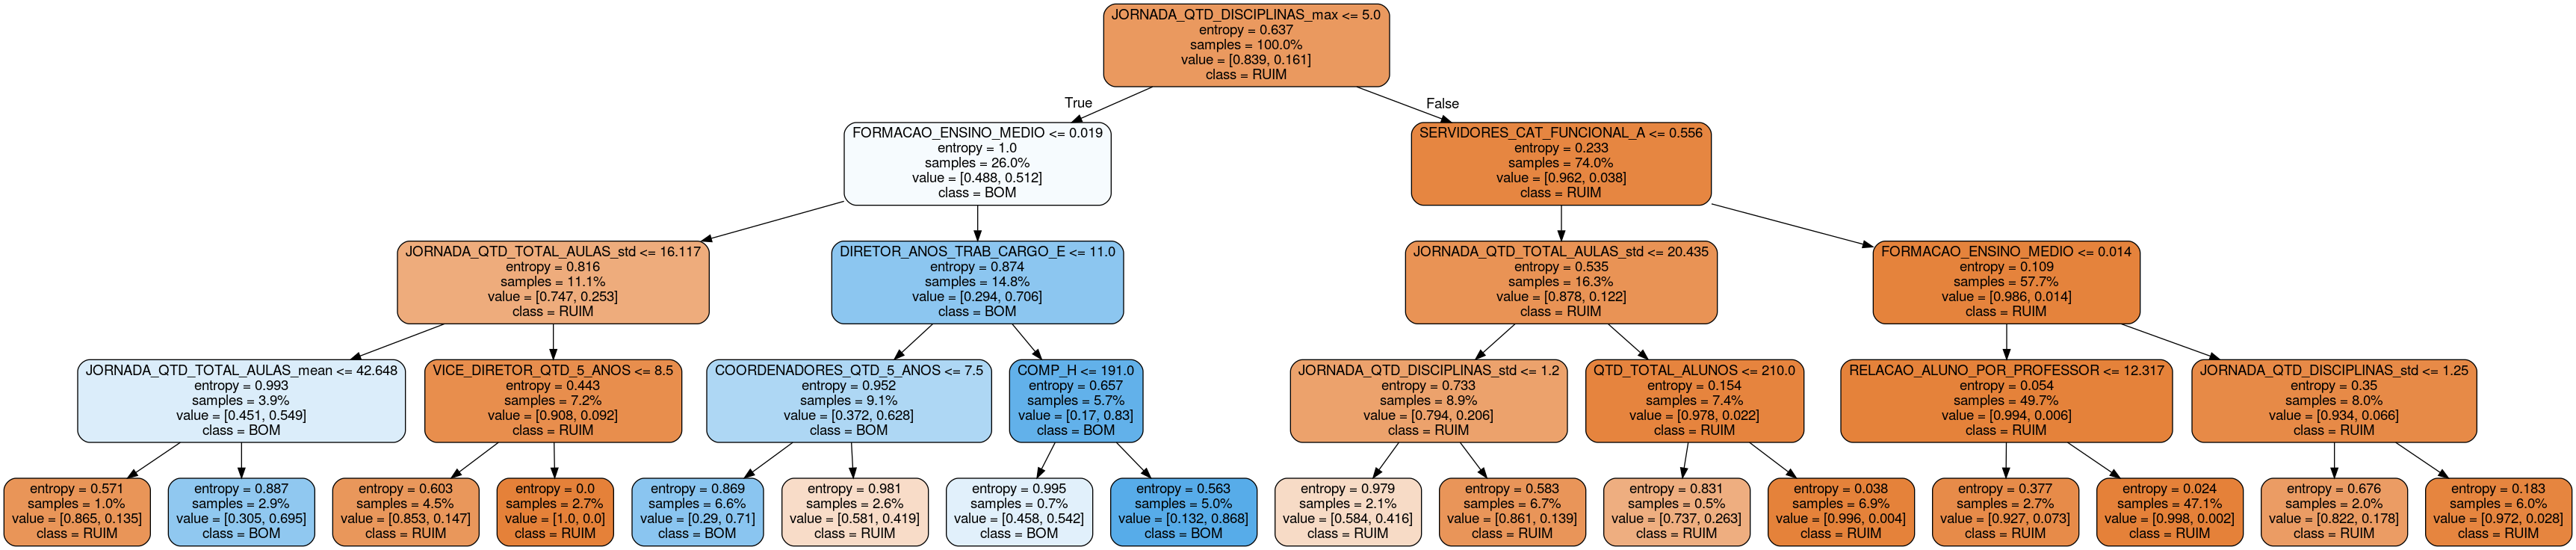

In [29]:
Image(graph.create_png())

Exemplo de caminho extraido da Arvore de Decisao 

*QTD MAXIMA DE DISCIPLINAS DE UM PROFESSOR NA ESCOLA NAO SER TAO ALTA* **==>** *TER ALGUNS PROFESSORES COM ENSINO MEDIO (POSSIVELMENTE ESTUDANTES DE GRADUACAO)* **==>** *DIRETOR COM MAIS DE 11 ANOS NO CARGO* **-->** **BOM DESEMPENHO**